In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
data= pd.read_excel("/content/Data_Train (9).xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
for i in category: 
    print(i, data[i].unique())


NameError: ignored

In [ ]:
#We now spilt the Date column to extract the 'Date','Month'and 'Year' value, and store them in new columns in our dataframe.
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey


0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [ ]:
#Treating the data_column


data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [ ]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
#Since the maximum number of stops is 4,there should be maximum 6 cities in any particular route.we split the data in rounte col

data.Route=data.Router.str.split('')
data.Route

AttributeError: ignored

In [ ]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [ ]:
#In the similar manner,we split the Dep_time column, and create separate columns for departure hours and minutes -
data.Dep_Time=data.Dep_Time.str.split(':')

In [ ]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [ ]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [ ]:
data['Arrival_data']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [ ]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [ ]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [ ]:
#Next,we divided the 'Duration' column to 'Travel_hours' and 'Travel_mins'

data.Duration=data.Duration.str.split(' ')


In [ ]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [ ]:
#We also treat the 'Total_stops' column,and replace non-stop flights with 0 value and extract the integer part of the'Total_str
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [ ]:
#We also treat the 'Total_stops' column, and replace non-stop slights with 0 value and extract the integer part of the 'Total_stop
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split('')
data.Total_Stops=data.Total_Stops.str[0]


In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [ ]:
data.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   1
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                   1
City4                   1
City5                   1
City6                   1
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_data         6348
Time_of_Arrival         0
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [ ]:
#We also drop some columns like 'city6' and 'city5,since majority of the data in these columns was NaN(null)
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [ ]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [ ]:
#Checking Null Values
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                   1
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_data         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [ ]:
#filling  City3 as None, the missing values are less
data['City3'].fillna('None',inplace=True)

In [ ]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

KeyError: ignored

In [ ]:
data['Travel_Mins'].fillna(0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   Year               10683 non-null  object
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10683 non-null  object
 12  Dep_Time_Hour      10683 non-null  object
 13  Dep_Time_Mins      10683 non-null  object
 14  Arrival_data       4335 non-null   object
 15  Arrival_Time_Hour  10683 non-null  object
 16  Arrival_Time_Mins  10683 non-null  objec

In [ ]:
#changing the numerical colunms from object to int
#data.Total_Stops=data.Total_stop.atype('int64')
data.Date=data.Date.astpye('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astpye('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
#data.Travel_Hours=data.Travel_Hours.astype('int64')
data.Travel_Mins=data.Trival_Mins.astype('int64')



AttributeError: ignored

In [ ]:
data[data['Travel_Hours']=='5']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_data,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
3,IndiGo,Kolkata,Banglore,,No info,6218,12,05,2019,C,C,U,18,05,NaN,23,30,5,25
20,GoAir,Delhi,Cochin,,No info,19495,6,03,2019,D,E,L,14,10,NaN,19,20,5,10
26,IndiGo,Delhi,Cochin,,No info,8238,1,06,2019,D,E,L,21,50,02,03,35,5,45
27,GoAir,Delhi,Cochin,,No info,7682,15,05,2019,D,E,L,07,00,NaN,12,55,5,55
34,Jet Airways,Delhi,Cochin,,In-flight meal not included,12373,18,05,2019,D,E,L,07,05,NaN,12,35,5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,IndiGo,Delhi,Cochin,,No info,5636,9,06,2019,D,E,L,02,00,NaN,07,25,5,25
10619,IndiGo,Delhi,Cochin,,No info,6307,27,04,2019,D,E,L,21,50,28,03,35,5,45
10628,SpiceJet,Kolkata,Banglore,,No info,8224,9,05,2019,C,C,U,15,55,NaN,21,25,5,30
10631,IndiGo,Delhi,Cochin,,No info,6037,15,05,2019,D,E,L,02,00,NaN,07,45,5,45


In [ ]:
data.drop(index=6474,inplace=True,axis=0)

In [ ]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [ ]:
categorical=['Airline','Source','Destination','Additional_Info','city1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arribal_date','Arrival_Time_Hour',
           'Arrival_Time_Mins','Travel_Hours','Travel_Mins']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1  =le.fit_transform(data.City1  )
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_data,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,0,7,3897,24,03,2019,0,3,4,22,20,22,01,10,2,50
1,1,3,0,0,7,7662,1,05,2019,1,1,5,05,50,NaN,13,15,7,25
2,4,2,1,0,7,13882,9,06,2019,2,2,1,09,25,10,04,25,19,0
3,3,3,0,0,7,6218,12,05,2019,1,1,5,18,05,NaN,23,30,5,25
4,3,0,5,0,7,13302,01,03,2019,0,3,4,16,50,NaN,21,35,4,45


In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_data,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,0,7,3897,24,03,2019,0,3,4,22,20,22,01,10,2,50
1,1,3,0,0,7,7662,1,05,2019,1,1,5,05,50,NaN,13,15,7,25
2,4,2,1,0,7,13882,9,06,2019,2,2,1,09,25,10,04,25,19,0
3,3,3,0,0,7,6218,12,05,2019,1,1,5,18,05,NaN,23,30,5,25
4,3,0,5,0,7,13302,01,03,2019,0,3,4,16,50,NaN,21,35,4,45


In [ ]:
data = data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_']]

KeyError: ignored

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_data,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,0,7,3897,24,03,2019,0,3,4,22,20,22,01,10,2,50
1,1,3,0,0,7,7662,1,05,2019,1,1,5,05,50,NaN,13,15,7,25
2,4,2,1,0,7,13882,9,06,2019,2,2,1,09,25,10,04,25,19,0
3,3,3,0,0,7,6218,12,05,2019,1,1,5,18,05,NaN,23,30,5,25
4,3,0,5,0,7,13302,01,03,2019,0,3,4,16,50,NaN,21,35,4,45


KeyError: ignored

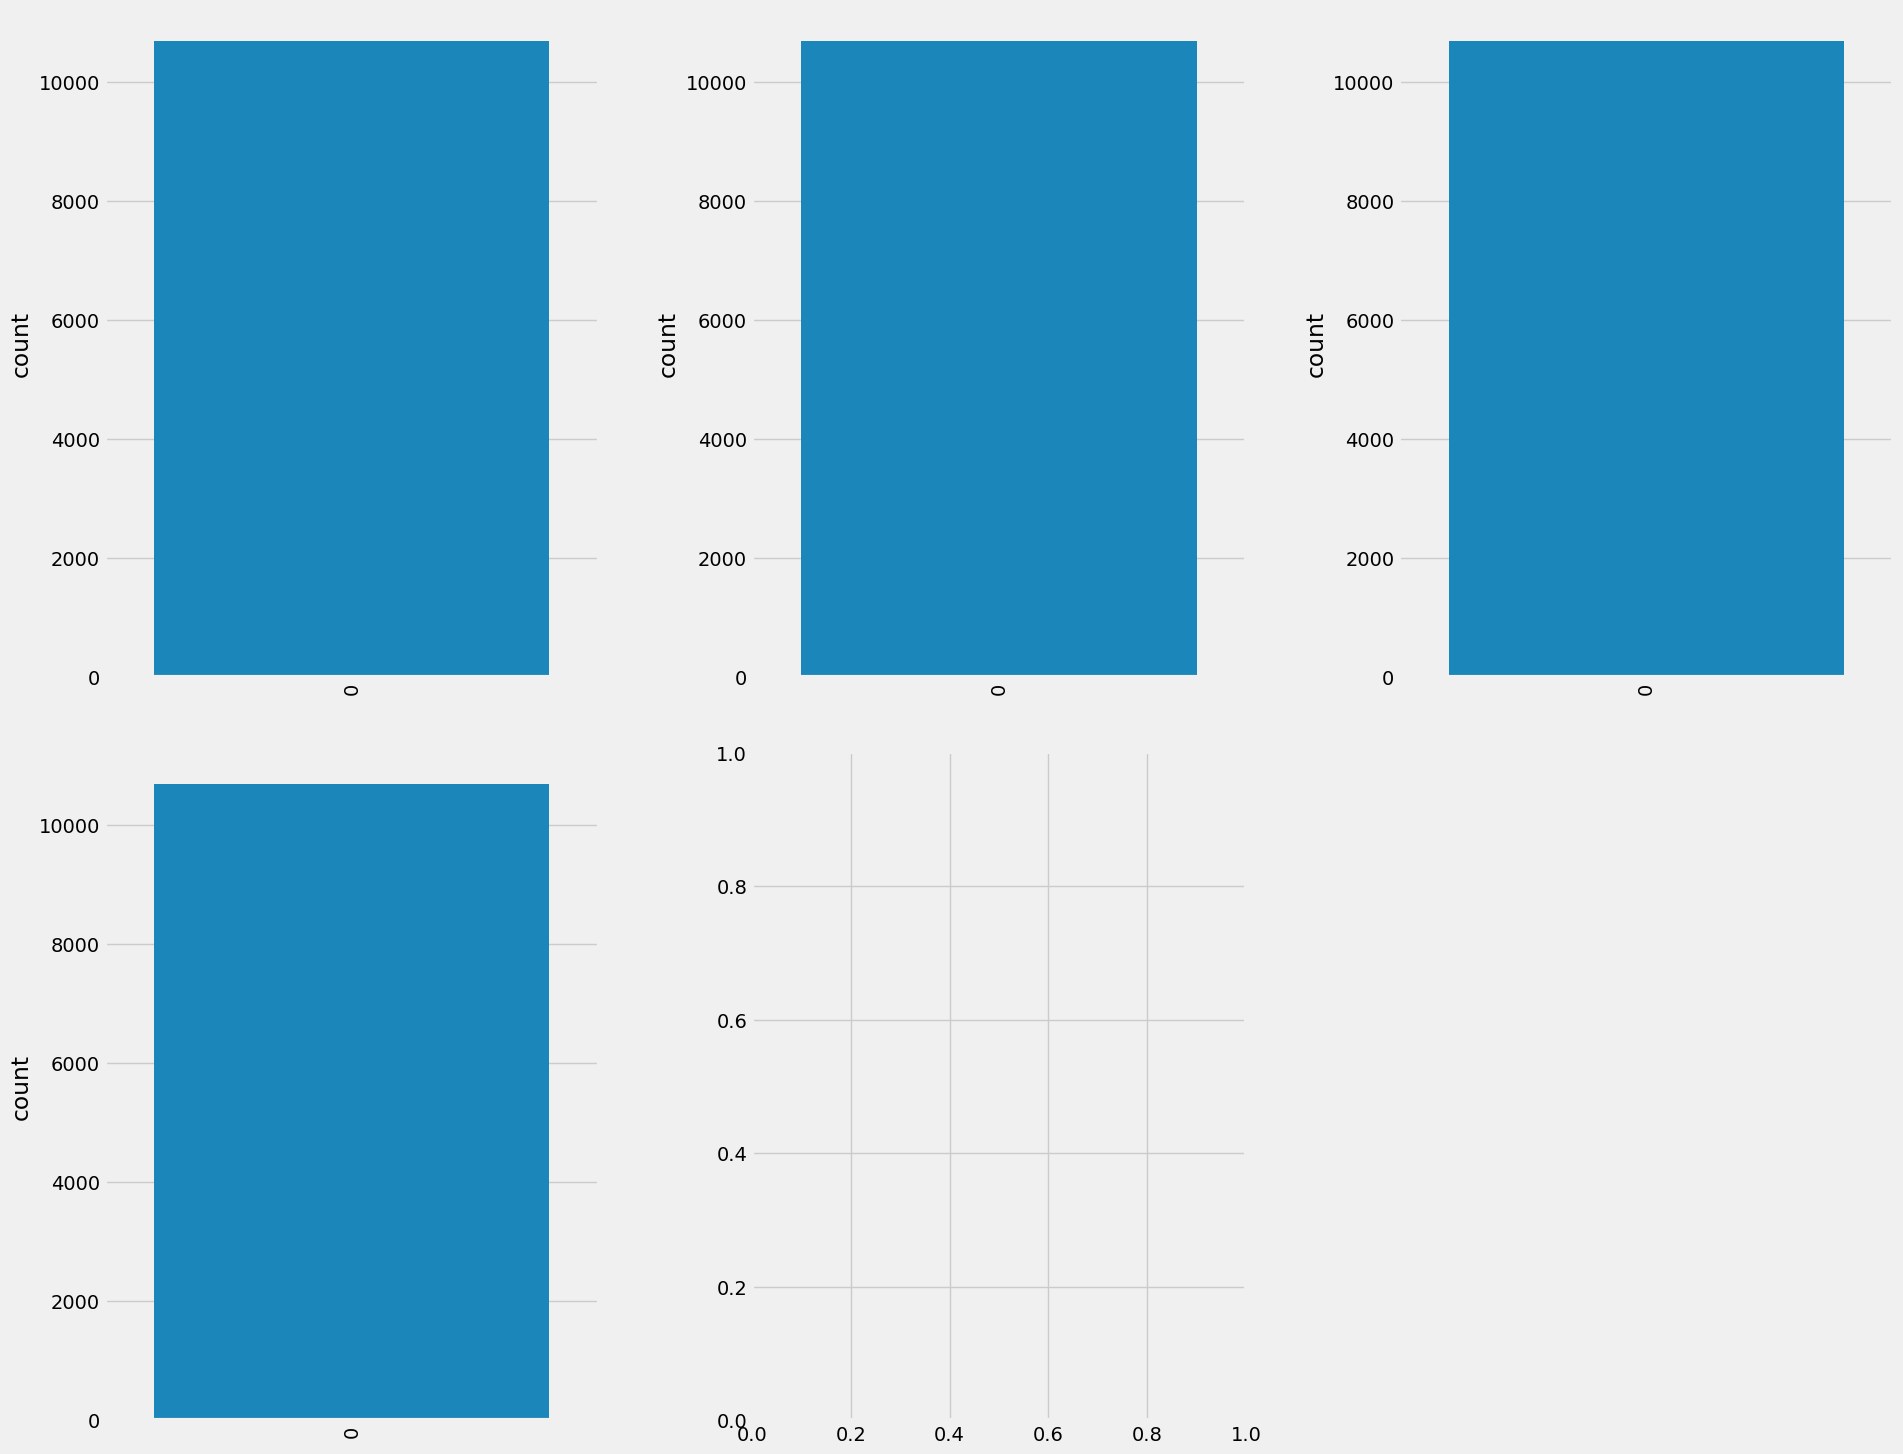

In [ ]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1

plt.show()

<Axes: xlabel='Price', ylabel='Density'>

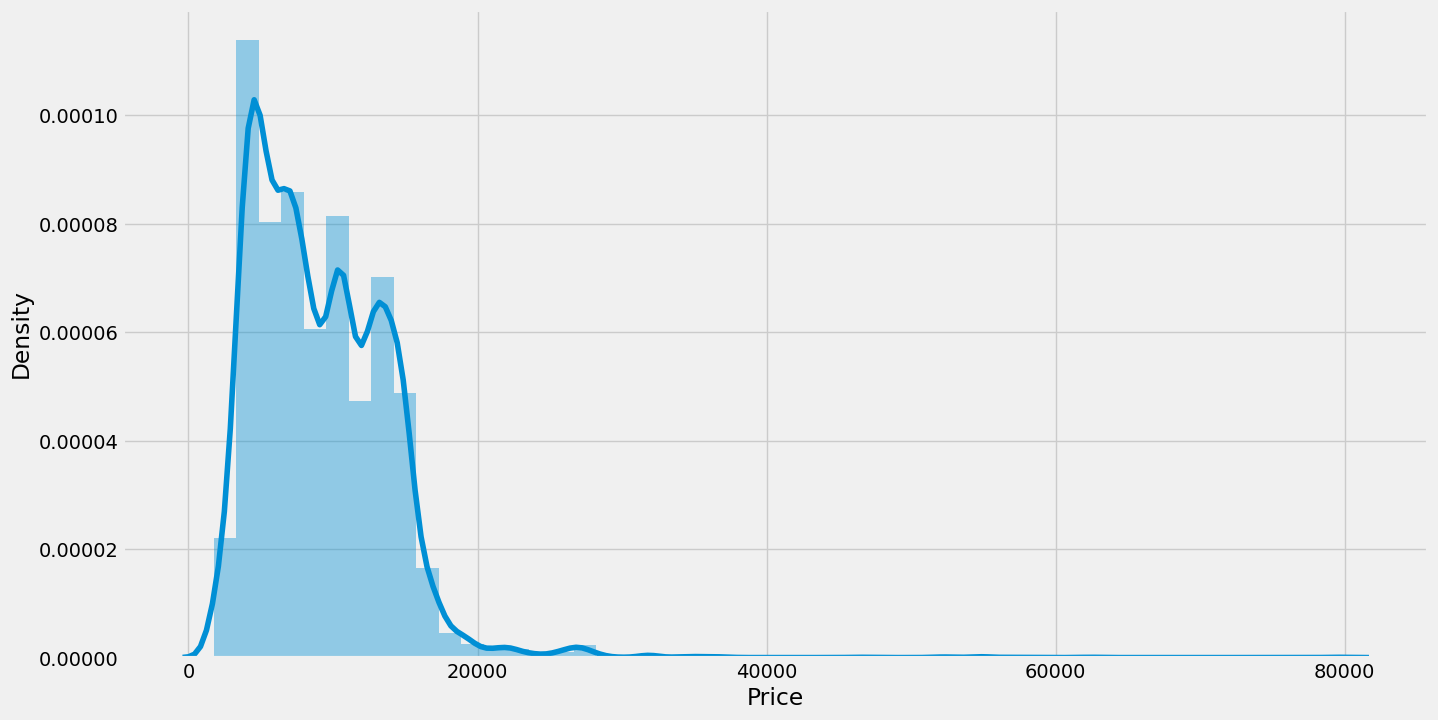

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

<Axes: >

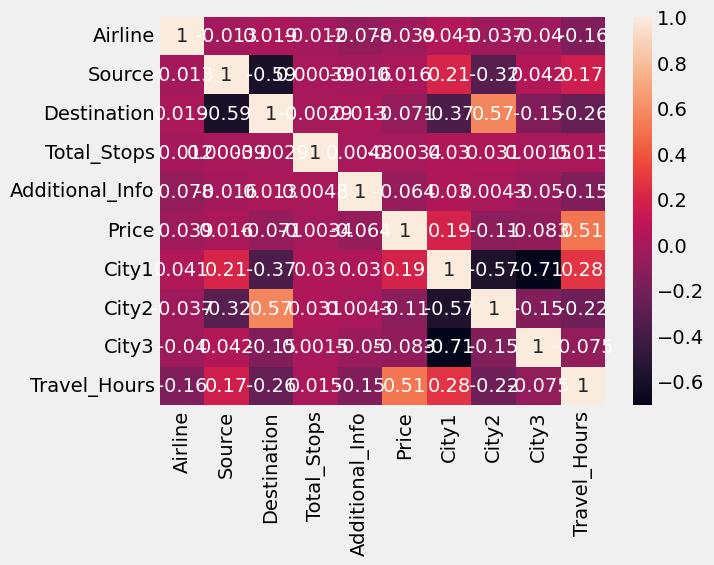

In [ ]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

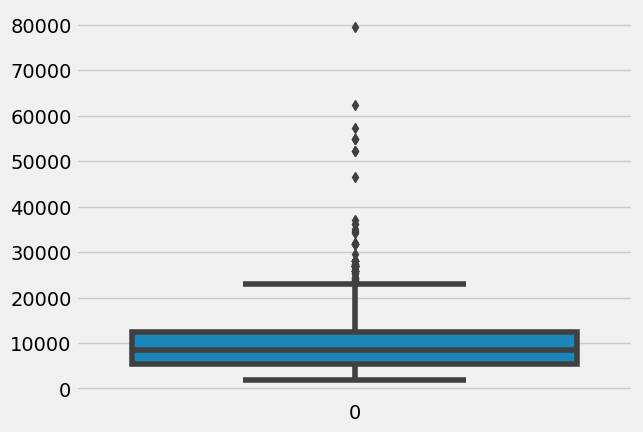

In [ ]:
import seaborn as sns
sns.boxplot(data['Price'])

In [ ]:
y = data['price']
x = data.drop(columns=['price'],axis=1)

KeyError: ignored

In [ ]:
### Scalling the Data

In [ ]:
from sklearn.preprocessing import StandartScaler
ss=StandardScaler()

ImportError: ignored

In [ ]:
x_scaled = ss.fit_transform(x)

NameError: ignored

In [ ]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

NameError: ignored

In [ ]:
x_train.head()

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
       print(i)
       
       print("R2 score is",r2_score(y_test,y_pred))
       print("R2 for train data",r2_score(y_train,i.predict(x_train)))
       print("Mean Sbsolute Error is",mean_absolute_error(y_pred,y_test))
       print("Mean Squared Error is",(mean_squared_error(y_pred,y_test)))
       print("Root Mean Sqaured Error is",(mean_squared_error(y_pred,y_test,squared=False)))

NameError: ignored

In [ ]:
from sklearn.neighborn import KNeighbornsRegressor
from sklearn.svm import SVM
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score_maen_absolute_error_mean_squared_error

knn=KNeighbrosRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_scaled)
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 Score is',r2_score(y_test,y_pred))
        print('R2 Score for train data',r2_score(y_train,i.predict(x_train)))
        print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
        print('Root Mean Squared Error is',(mean_squared_error(y_test,y_pred,squared=False)))


SyntaxError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())


NameError: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],
            'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)

NameError: ignored

In [ ]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

gb_res.fit(x_train,y_train)


NameError: ignored

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))
  



NameError: ignored

In [ ]:
knn=KNeighbornsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

NameError: ignored

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

NameError: ignored

In [ ]:
price_list=pd.DataFrame({'price':prices})

NameError: ignored

In [ ]:
price_list

NameError: ignored

In [ ]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))


NameError: ignored

In [ ]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))

NameError: ignored

In [ ]:
from flask import flask,render_template,request
import numpy as np
import pickle

ImportError: ignored

In [ ]:
model =pickle.load(open(r"model1.pkl",'rb'))

NameError: ignored

In [ ]:
@app.route("/home")
def home():
  return render_template('home.html')

NameError: ignored

In [ ]:
@app.route("/predict")
def home1():
    return render_template('predict.html')





@app.route("/pred", methods=['POST','GET'])
def predict():
    x = [[int(x) for x in request.form.values()]]
    print(x)

    x = np.array(x)
    print(x.shape)

    print(x)
    pred = model.predict(x)
    print(pred)
    return render_template('submit.html',prediction_text=pred)

NameError: ignored

In [ ]:
if _ _name_ _  ==  "_ _main_ _":
     app.run(debug=False)

SyntaxError: ignored

In [ ]:
Serving Flask app "app" (lazy loading)
Environment: production
WARNING: This is a development server. Do not use it in a production
Use a production WSGI server instead.
Debug mode: off
Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)

SyntaxError: ignored